In [1]:
import pandas as pd
import numpy as np

In [2]:
#Inspect the first few rows of the dataframe
#This data is a hypothetical stock dataset (not meant to be accurate)

#Note - date is in YYYY-MM-DD ( %Y-%m-%d ) format
df = pd.read_csv('time_series_data.csv')
df.head()

,Date,Volume (in millions)
0,2018-01-01,184
1,2018-01-02,324
2,2018-01-03,551
3,2018-01-04,303
4,2018-01-05,449


## Inspect the data

In [3]:
df.describe()

,Volume (in millions)
count,1156.000000
mean,300.557958
std,169.753698
min,10.000000
25%,151.000000
50%,300.000000
75%,445.000000
max,599.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  1156 non-null   object
 1   Volume (in millions)  1156 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.2+ KB


<AxesSubplot: xlabel='Date'>

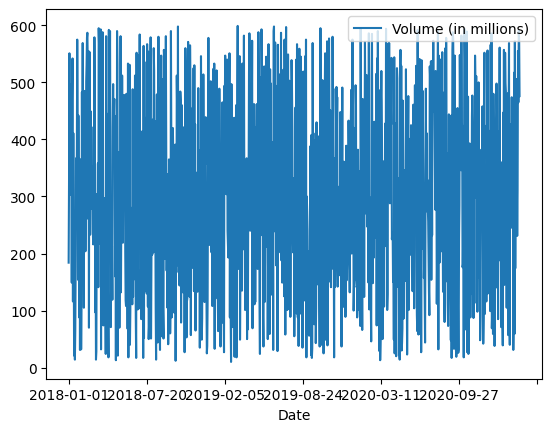

In [5]:
#Plot the time series with date as the x-axis and volume as the y-axis
df.plot(x='Date', y='Volume (in millions)')

## Convert "Date" column to datetime objects

In [6]:
#Work with dates as pandas datetime objects
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
#Understand the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1156 non-null   datetime64[ns]
 1   Volume (in millions)  1156 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 18.2 KB


In [8]:
#How much time does the data cover?
df['Date'].max() - df['Date'].min()

Timedelta('1155 days 00:00:00')

In [9]:
#Create another column called Year
df['Year'] = df['Date'].dt.year

In [10]:
#Visually inspect the dataframe
df.head()

,Date,Volume (in millions),Year
0,2018-01-01,184,2018
1,2018-01-02,324,2018
2,2018-01-03,551,2018
3,2018-01-04,303,2018
4,2018-01-05,449,2018


## Set "Date" column to the index
If we don't set the index as our date variable for this dataframe, we'll have access to relatively limited functionality.

In [11]:
#Critical step - set the index as our Date column
df = df.set_index('Date')

In [12]:
df.head()

,Volume (in millions),Year
Date,,
2018-01-01,184,2018
2018-01-02,324,2018
2018-01-03,551,2018
2018-01-04,303,2018
2018-01-05,449,2018


In [13]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23',
               '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27',
               '2021-02-28', '2021-03-01'],
              dtype='datetime64[ns]', name='Date', length=1156, freq=None)

In [14]:
#Now that we have a Datetime index, we can use .resample()
df.resample("Y")['Volume (in millions)'].mean()

Date
2018-12-31    299.041096
2019-12-31    301.602740
2020-12-31    297.169399
2021-12-31    324.100000
Freq: A-DEC, Name: Volume (in millions), dtype: float64

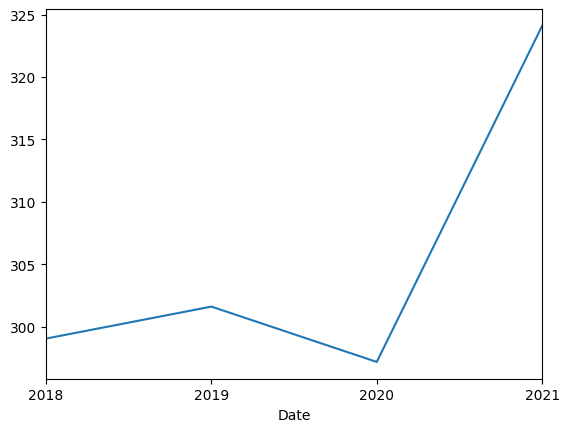

In [15]:
#Get the yearly mean volume
df.resample("Y")['Volume (in millions)'].mean().plot();

In [16]:
#Get what day of the week the date falls on 
df['day_of_week'] = df.index.dayofweek
df.head()

,Volume (in millions),Year,day_of_week
Date,,,
2018-01-01,184,2018,0
2018-01-02,324,2018,1
2018-01-03,551,2018,2
2018-01-04,303,2018,3
2018-01-05,449,2018,4


In [17]:
# Get all the rows where the days are a Monday
mondays = df[(df['day_of_week'].isin([0]))]
mondays.head()

,Volume (in millions),Year,day_of_week
Date,,,
2018-01-01,184,2018,0
2018-01-08,443,2018,0
2018-01-15,21,2018,0
2018-01-22,365,2018,0
2018-01-29,366,2018,0


In [18]:
#Calculate the mean volumn for all Mondays
mondays['Volume (in millions)'].mean()

299.36746987951807

In [19]:
#Convert our date variable to a specified format
temp_df = df.copy()
temp_df.index = df.index.strftime('%B %d, %Y')
temp_df.head()

,Volume (in millions),Year,day_of_week
Date,,,
"January 01, 2018",184,2018,0
"January 02, 2018",324,2018,1
"January 03, 2018",551,2018,2
"January 04, 2018",303,2018,3
"January 05, 2018",449,2018,4


**Note:** If we don't set the index as our date variable, we would be forced to used the `dt` accessor. For example, in order to convert the date variable to a specific format, we would have had to use: 

`df['Date'].dt.strftime('%B %d, %Y')`

## Dealing with missing data

In [20]:
new_df = pd.read_csv('missing_time_series_data.csv', index_col = 'index')
new_df.head()

,Date,Volume (in millions)
index,,
0,2018-01-01,184.0
1,2018-01-02,324.0
2,2018-01-03,551.0
3,2018-01-04,303.0
4,NaN,NaN


In [21]:
#Work with dates as pandas datetime objects
new_df['Date'] = pd.to_datetime(new_df['Date'])
new_df.head()

,Date,Volume (in millions)
index,,
0,2018-01-01,184.0
1,2018-01-02,324.0
2,2018-01-03,551.0
3,2018-01-04,303.0
4,NaT,NaN


In [22]:
new_df.isna().sum()

Date                    578
Volume (in millions)    578
dtype: int64

In [23]:
#Fill NA by propogating last valid observation forward to the next valid
new_df = new_df.fillna(method="ffill")

In [24]:
new_df.isna().sum()

Date                    0
Volume (in millions)    0
dtype: int64